<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Ago25-26/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 3**

1.Crear una función que ajuste los pesos para un modelo dado como argumento el grado del polinomio ajustado. La función debe devolver el costo total en el conjunto de datos dado como entrenamiento.

2.Crear una función que calcule el costo de un modelo ya ajustado pero ahora en el conjunto de validación.

3.Hacer una gráfica del costo en el conjunto de entrenamiento Vs el grado del polinomio y otra del costo en el conjunto de validación Vs el grado del polinomio.

4.Hacer una función qué calcule el costo de cross-validación con K=N y graficar el costo de cross-validación como función del grado del polinomio.
Trabajar hasta el grado igual 8 en todos los casos.

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Importamos nuestro dataset
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Data/olympic100m_men.txt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Funcion que calcula los pesos para un modelo dado como argumento el polinomio ajustado

def cost_train_data(x, y, n=1):

  datax = [x**(i) for i in range(n+1)]
  X = np.vstack(datax).T
  w = np.linalg.inv(X.T @ X) @ X.T @ y

  w = np.sum((X @ w- y)**2)

  return w

In [52]:
# Guardamos los datos

data = np.loadtxt(file,delimiter=",").T

x = data[0]
x = (x-1896)/4
y = data[1]

Text(0.5, 1.0, 'Costo vs Grado')

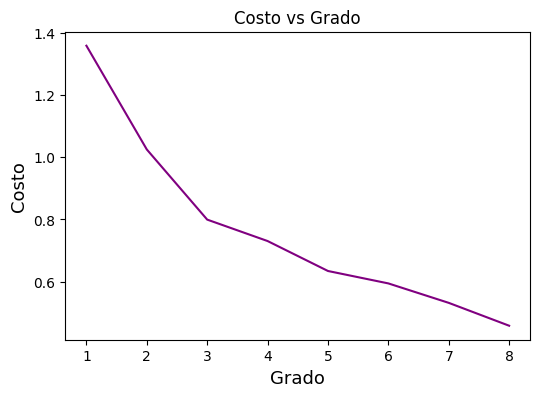

In [53]:
# Graficamos el costo total vs el grado

degree = 8
costos = [cost_train_data(x, y, i) for i in range(1, degree+1)]
degrees = np.arange(1, degree+1)

fig = plt.figure(figsize = (6, 4))
plt.plot(degrees, costos, color='purple')

plt.xlabel('Grado', fontsize = 13)
plt.ylabel('Costo', fontsize = 13)
plt.title('Costo vs Grado')

In [49]:
# Función que calcula el costo de un modelo ya ajustado pero ahora en el conjunto de validación.

def cost_validation(x, y, w):

  data = np.vstack([x**(i) for i in range(len(w))]).T
  prediccion = data @ w
  L = np.sum((prediccion - y)**2)

  return L

def w_model(x, y, n=1):

    datax = [x**(i) for i in range(n+1)]
    X = np.vstack(datax).T
    w = np.linalg.inv(X.T @ X) @ X.T @ y

    return w

def poly(x, w):

  y_p = 0
  for i in range(len(w)):
    y_p += w[i]*x**(i)

  return y_p

In [59]:
# Conjunto de validacion
validation_set_x = x[x>21]
validation_set_t = y[x>21]

# Conjunto de entrenamiento
train_set_x = x[x<21]
train_set_t = y[x<21]

In [55]:
# Calculamos los pesos hasta grado 8
weights = [w_model(train_set_x, train_set_t, i) for i in range(1, degree+1)]

# Calculamos los costos del conjunto de validacion
cost_validations = [cost_validation(validation_set_x, validation_set_t, w) for w in weights]


Text(0.5, 1.0, 'Costo de Validacion vs Grado')

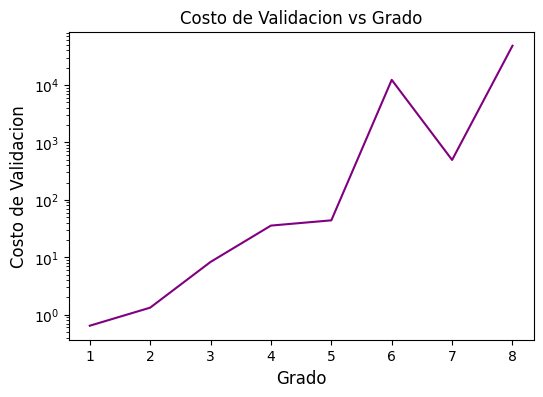

In [58]:
# Graficamos
fig = plt.figure(figsize=(6,4))
plt.plot(degrees, cost_validations, color='purple')

plt.yscale('log')
plt.xlabel('Grado', fontsize=12)
plt.ylabel('Costo de Validacion', fontsize=12)
plt.title('Costo de Validacion vs Grado')

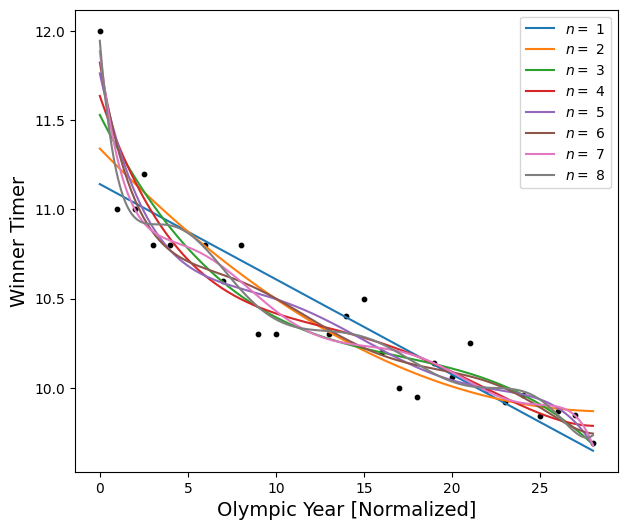

In [60]:
# Graficamos el ajuste hasta grado 8 para comparar

fig = plt.figure(figsize=(7, 6))
plt.scatter(x, y, s = 10, color = 'black')
degree = 8
x_aux = np.linspace(np.min(x), np.max(x), 250)

for i in range(1, degree+1):
    plt.plot(x_aux, poly(x_aux, w_model(x, y, i)), label = r'$n = $ {}'.format(i))
plt.legend()

plt.xlabel('Olympic Year [Normalized]', fontsize = 14)
plt.ylabel('Winner Timer', fontsize = 14);

In [67]:
# Función qué calcule el costo de cross-validación con K=N

def leave_one_out_cross_validation(x, y, n):
  samples = len(x)
  total_cost = 0

  for i in range(samples):
    # Consideramos un dato para validar el modelo
    x_val = x[i]
    y_val = y[i]
    # Siendo el resto de datos usados para entrenar el modelo
    x_train = np.delete(x, i)
    y_train = np.delete(y, i)
    # Entrenamos el modelo
    w_aux = w_model(x_train, y_train, n)
    # Calculamos el costo de validacion
    costo = cost_validation(x_val, y_val, w_aux)
    # Sumamos los costos
    total_cost += costo

  return total_cost/samples

Text(0, 0.5, 'LOOCV')

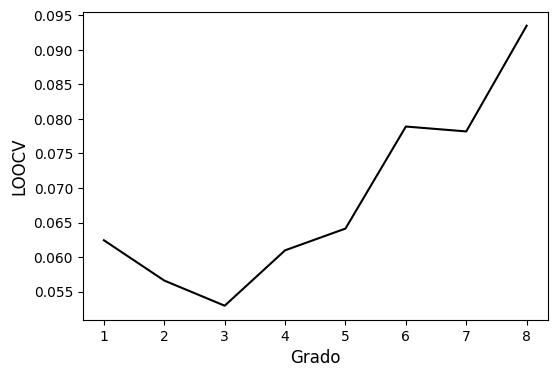

In [68]:
# Graficamos

degree = 8
degrees = np.arange(1, degree+1)

loocv = [leave_one_out_cross_validation(x, y, i) for i in range(1, degree+1)]

fig = plt.figure(figsize=(6, 4))
plt.plot(degrees, loocv, color = 'black')

plt.xlabel('Grado', fontsize=12)
plt.ylabel('LOOCV', fontsize=12)

In [69]:
w_model(x, y, 1)

array([11.14109659, -0.05332354])